## 유저가 좋아하는 특정 아티스트와 유사한 다른 아티스트를 추천하는 추천시스템

### (1) 데이터 탐색 및 전처리

In [33]:
import pandas as pd
import os

#### 데이터 준비

In [34]:
file_name = os.getenv('HOME') + '/aiffel/recommendation_system/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']
data = pd.read_csv(file_name, sep='\t', names=col_names)
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [35]:
# artist_MBID 는 우리의 관심사가 아니므로 제거
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [36]:
# 쉬운 검색을 위해 아티스트 문자열을 소문자로 바꿔준다.
data['artist'] = data['artist'].str.lower()
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [6]:
# 첫 번째 유저가 어떤 아티스트의 노래를 듣는지 확인
condition = (data['user_id'] == data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


#### 데이터 탐색

In [37]:
# 유저 수
data['user_id'].nunique()

358868

In [38]:
# 아티스트 수
data['artist'].nunique()

291346

In [39]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [10]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [11]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

#### 모델 검증을 위한 사용자 초기 정보 세팅

In [40]:
my_favorite = ['black eyed peas', 'maroon5', 'jason mraz', 'coldplay', 'beyonce']

#'zimin' 이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정
my_playlist = pd.DataFrame({'user_id' : ['zimin']*5, 'artist' : my_favorite, 'play' : [30]*5})

if not data.isin({'user_id' : ['zimin']})['user_id'].any():      #user_id에 'zimin' 이라는 데이터가 없다면
    data = data.append(my_playlist)                              #위에 만든 my_favorite 데이터 추가

data.tail(10)

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyonce,30


#### 모델에 활용하기 위한 전처리

In [41]:
# 고유 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# indexing
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [42]:
# 인덱싱 잘 되었나 확인
print(user_to_idx['zimin'])
print(artist_to_idx['black eyed peas'])

358868
376


In [43]:
# indexing을 통해 데이터 칼럼 내 값을 바꾸는 코드

temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):
    print('user_id column indexing OK!')
    data['user_id'] = temp_user_data
else:
    print('user_id column indexing FAILed..')

temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist_id column indexing OK!')
    data['artist'] = temp_artist_data
else:
    print('artist_id column indexing FAILed..')

user_id column indexing OK!
artist_id column indexing OK!


### (2) 사용자의 명시적/암묵적 평가

- 우리의 데이터가 좋아요나 별점처럼 선호도를 명시적으로 나타내면 좋지만 우리는 사용자가 아티스트의 곡을 몇 번 플레이했나에 대한 데이터밖에 없다.

??? : 어떤 유저가 아티스트의 곡을 한 번만 들었다면, 이 아티스트를 좋아하는 걸까 싫어하는 걸까?   

!!! : 애매하다.

In [16]:
# 1회만 play한 데이터의 비율
only_one = data[data['play']<2]
one, all = len(only_one), len(data)
print(f'{one}, {all}')
print(f'Ratio of only one over all data : {one / all:.2%}')

147740, 17535660
Ratio of only one over all data : 0.84%


- 우리가 만들어갈 모델에서는 암묵적 데이터의 해석을 위해 다음과 같이 규칙을 적용할 것이다.

1. 한 번이라도 들었으면 선호한다고 판단
2. 많이 재생한 아티스트에 대해 가중치를 주어서 확실히 좋아한다고 판단

### (3) Matrix Factorization
   
   
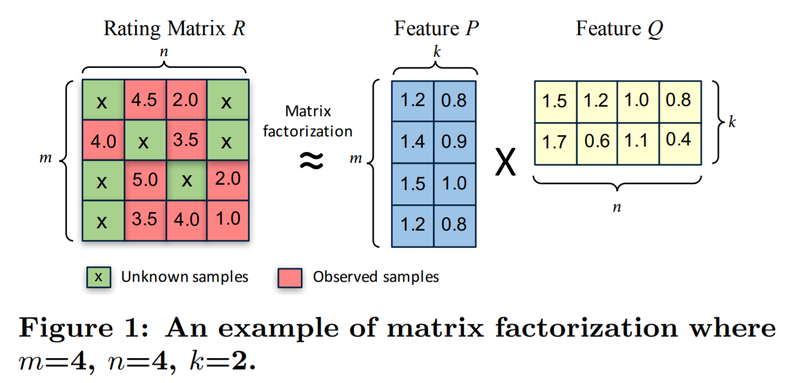

- 여기서 (m,n)은 m명의 사용자들이 n명의 아티스트에 대해 펴가한 데이터를 평가행렬로 만든 것이다.   

- 우리 모델의 경우 내가 black eyed peas를 play 했으므로 내 벡터와 black eyed peas의 벡터를 곱했을 때 1에 가까워야 잘 학습됐다고 할 수 있다.

### (4) CSR(Compressed Sparse Row) Matrix

- (유저 수 X 아티스트 수) 만큼의 정보 안에는 유저가 들어보지 않은 아티스트에 대한 정보까지 모두 행렬에 포함되어 계산된다. 아무리 많은 아티스트를 들어 본 유저도 수백 명을 넘어갈 만큼의 아티스트를 들어보지 못했는데, 총 아티스트는 29만 명이 넘기 때문에 평가행렬 내의 대부분의 공간은 0으로 채워진다. 이런 행렬을 Sparse Matrix라고 한다. 이런 메모리 낭비를 최소화하기 위해서는 유저가 들어본 아티스트에 대해서만 정보만을 저장하면서 전체 행렬 형태를 유추할 수 있는 데이터 구조가 필요하다.

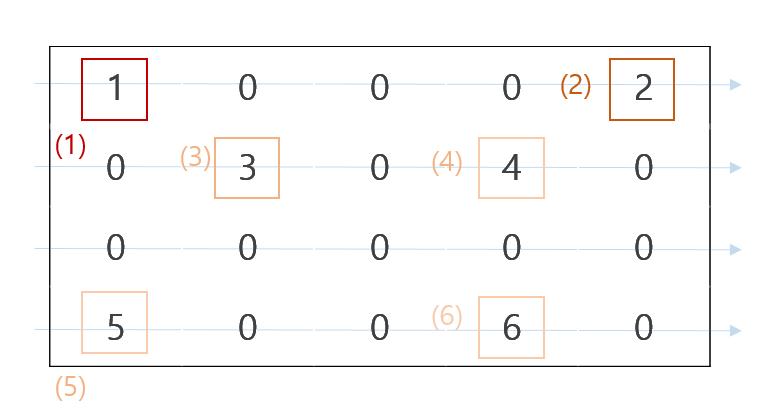

In [17]:
# print(csr.data) [1 2 3 4 5 6] -> 0 이 아닌 요소의 값
# print(csr.indices) [0 4 1 3 0 3] -> 데이터가 해당하는 column 값
# print(csr.indptr) [0 2 4 4 6]  -> 데이터 갯수 행마다 누적!

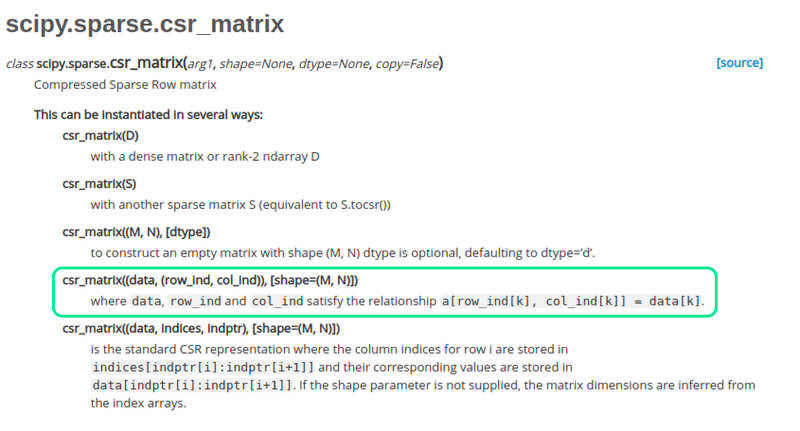

In [20]:
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))  #(mxn에서 m은 유저, n은 아티스트!)
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Row format>

### (5) MF 모델 학습

In [23]:
# implicit 패키지는 위에서 암묵적(implicit) dataset을 사용하는 모델을 빠르게 학습할 수 있는 패키지이다.
# 이 패키지에서 ALS 모델을 사용해보자
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분이다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [24]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [27]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose 해준다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [28]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

In [45]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

In [46]:
zimin_vector

array([-0.16129075,  0.33025163,  0.42577302, -0.73415   ,  0.12705891,
       -0.24233967,  0.4084157 ,  0.02627223, -0.35436317,  0.50955117,
        0.43474707,  1.281491  , -0.17601782,  0.69719523, -0.44759482,
       -0.43703532, -0.44579425,  0.07940802, -0.26536897, -0.6371062 ,
        1.4244184 , -0.6005214 ,  0.5967546 ,  0.1827036 ,  0.8055748 ,
        0.2524305 , -0.0138595 ,  0.66462636,  0.07540356, -0.14700814,
        0.37196073,  0.08433395, -0.14410621, -0.7234642 ,  0.1183231 ,
       -0.32213068, -0.1966414 , -0.07660927, -0.99164   , -0.09499606,
        0.52074206,  0.48349538,  0.8388118 , -0.14149381,  1.1245232 ,
       -0.08683061,  0.8987094 ,  1.6000751 , -0.72493184,  0.30139488,
       -0.24019004,  0.21983251,  0.11746021, -0.08244636, -0.1607423 ,
       -0.06195238,  0.3641158 , -0.22049995,  0.1320963 ,  0.24944188,
        0.10324614, -1.1681869 , -0.452955  , -0.35038066,  0.8417189 ,
       -0.04484373, -1.0824629 , -0.63935804, -1.156286  , -0.07

In [47]:
black_eyed_peas_vector

array([-0.00655951,  0.0044374 ,  0.00858971,  0.00060862,  0.0096677 ,
       -0.00775394,  0.00616711,  0.00807192,  0.00225803,  0.01476923,
       -0.00299452,  0.01400949,  0.00465734,  0.02031211,  0.00079709,
       -0.00685843, -0.00956756,  0.00024827, -0.00567185,  0.00352812,
        0.01241316,  0.00521652, -0.00116456,  0.02429477,  0.01378808,
        0.00744932,  0.0189549 ,  0.00404579,  0.00873937,  0.02127103,
        0.01378678,  0.01829009,  0.01070665,  0.00204443,  0.00442132,
        0.00067137,  0.01257165, -0.00534172, -0.00539628,  0.00618638,
        0.02013847,  0.00829642,  0.02047025,  0.00253536,  0.01482832,
        0.01375652,  0.01931472,  0.03670859, -0.01193667,  0.02657722,
       -0.00584714,  0.01435456, -0.0034536 ,  0.00395592,  0.00697513,
        0.00605379,  0.01297026, -0.01135908,  0.02226874,  0.00861434,
        0.0156897 , -0.02649535,  0.00415242,  0.0098623 ,  0.013088  ,
        0.00125447, -0.00433591, -0.00744877, -0.00408968,  0.00

In [48]:
np.dot(zimin_vector, black_eyed_peas_vector)

0.39960796

- 0.4정도로 낮은 수치가 나왔다.

- queen 에 대한 선호도 예측

In [49]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.28999615

### (6) 비슷한 아티스트 찾기 + 유저에게 추천하기

In [50]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0),
 (277, 0.98682237),
 (28, 0.979092),
 (5, 0.97442466),
 (473, 0.9728848),
 (217, 0.9668171),
 (247, 0.95503694),
 (418, 0.95161),
 (490, 0.9491836),
 (910, 0.9443591),
 (694, 0.94206214),
 (1018, 0.9409773),
 (773, 0.9356791),
 (55, 0.9350137),
 (531, 0.9330172)]

In [51]:
# 아티스트의 id를 다시 이름으로 mapping
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'red hot chili peppers',
 'placebo',
 'radiohead',
 'the beatles',
 'u2',
 'oasis',
 'nirvana',
 'foo fighters',
 'the smashing pumpkins',
 'nine inch nails',
 'arctic monkeys',
 'depeche mode']

In [52]:
# 함수로 구현
def get_similar_artist(artist_name : str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist


In [53]:
get_similar_artist('2pac')

['2pac',
 'dr. dre',
 'the game',
 'notorious b.i.g.',
 'snoop dogg',
 '50 cent',
 'nas',
 'ice cube',
 'jay-z',
 'bone thugs-n-harmony']

- 힙합은 마니아들이 많아서 더 잘 추천되는 것 같다.   

- 마니아들은 특정 장르의 아티스트들에게로 선호도가 집중되고, 다른 장르의 아티스트들과는 선호도가 낮게 나타날 것이다. 이런 마니아들의 존재로 인해 같은 장르의 아티스트들의 벡터들도 더 가까워져서 get_similar_artist시 장르별 특성이 두드러지게 될 것이다.

#### 유저에게 아티스트 추천하기

In [54]:
user = user_to_idx['zimin']
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(24, 0.369923),
 (627, 0.35460985),
 (28, 0.3404895),
 (277, 0.3305015),
 (5, 0.32927626),
 (409, 0.3252256),
 (382, 0.32425654),
 (369, 0.3229633),
 (35, 0.320467),
 (274, 0.31969738),
 (55, 0.3172797),
 (509, 0.31572625),
 (724, 0.31389278),
 (247, 0.31358004),
 (418, 0.3077402),
 (350, 0.30727386),
 (217, 0.30415553),
 (490, 0.30268142),
 (457, 0.3024905),
 (550, 0.30133468)]

In [55]:
[idx_to_artist[i[0]] for i in artist_recommended]

['jack johnson',
 'maroon 5',
 'the killers',
 'muse',
 'red hot chili peppers',
 'amy winehouse',
 'mika',
 'justin timberlake',
 'john mayer',
 'michael jackson',
 'arctic monkeys',
 'keane',
 'lily allen',
 'the beatles',
 'u2',
 'rihanna',
 'radiohead',
 'oasis',
 'franz ferdinand',
 'britney spears']

- explain 메소드를 사용하여 이 추천에 기여한 정도를 확인할 수 있다.

In [56]:
muse = artist_to_idx['muse']
explain = als_model.explain(user, csr_data, itemid=muse)

- 어떤 아티스트들이 이 추천에 얼마나 기여하고 있을까?

In [57]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('coldplay', 0.2616755728767471),
 ('jason mraz', 0.040140163384685436),
 ('black eyed peas', 0.03078465419594458),
 ('beyonce', 0.002006298034179583),
 ('maroon5', -0.0008335181371636813)]